In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import files
data = files.upload()

Saving Fish.csv to Fish.csv


In [3]:
data = pd.read_csv('Fish.csv')
df = data.copy()
df.sample(10)

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
107,3,Perch,300.0,7.5852,4.6354,26.9,28.7,30.1
117,3,Perch,650.0,11.1366,6.0030,36.5,39.0,41.4
17,1,Bream,700.0,14.9380,5.1975,30.4,33.0,38.5
16,1,Bream,700.0,14.8604,5.2854,30.4,33.0,38.3
100,3,Perch,197.0,6.5610,4.2390,23.5,25.6,27.0
77,3,Perch,100.0,5.2224,3.3216,16.2,18.0,19.2
45,5,Roach,160.0,7.0334,3.8203,20.5,22.5,25.3
149,6,Smelt,9.8,2.0832,1.2772,10.7,11.2,12.4
157,6,Smelt,19.7,2.8728,2.0672,13.2,14.3,15.2
15,1,Bream,600.0,15.4380,5.5800,29.4,32.0,37.2


In [4]:
# Ganti nama kolom
df.rename(columns={'Length1': 'LengthVer', 'Length2': 'LengthDia', 'Length3': 'LengthCro'}, inplace=True)

# Hapus kolom 'category'
df.drop(columns=['Category'], inplace=True)

# Tampilkan lima baris pertama dari DataFrame setelah perubahan
df.head()
#Species: Nama spesies ikan
#Weight: Berat ikan dalam gram
#Length1: Panjang vertikal dalam cm
#Length2: Panjang diagonal dalam cm
#Length3: Panjang silang dalam cm
#Height: Tinggi dalam cm
#Width: Lebar diagonal dalam cm

,Species,Weight,Height,Width,LengthVer,LengthDia,LengthCro
0,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    159 non-null    object 
 1   Weight     159 non-null    float64
 2   Height     159 non-null    float64
 3   Width      159 non-null    float64
 4   LengthVer  159 non-null    float64
 5   LengthDia  159 non-null    float64
 6   LengthCro  159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
print(str('Is there any NaN value in the dataset: '), df.isnull().values.any())
#mencari nilai null yang hilang

Is there any NaN value in the dataset:  False


In [7]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp.T
#jumlah setiap spesies

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


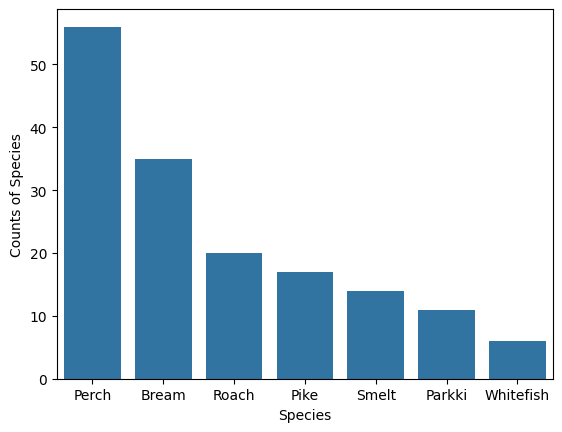

In [8]:
sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()
#rubah menjadi diagram bar

In [9]:
df.corr()
#korelasikan variabel

<ipython-input-9-44e5144b8d6a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Weight,Height,Width,LengthVer,LengthDia,LengthCro
Weight,1.000000,0.724345,0.886507,0.915712,0.918618,0.923044
Height,0.724345,1.000000,0.792881,0.625378,0.640441,0.703409
Width,0.886507,0.792881,1.000000,0.867050,0.873547,0.878520
LengthVer,0.915712,0.625378,0.867050,1.000000,0.999517,0.992031
LengthDia,0.918618,0.640441,0.873547,0.999517,1.000000,0.994103
LengthCro,0.923044,0.703409,0.878520,0.992031,0.994103,1.000000


<ipython-input-10-26bf02020529>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');


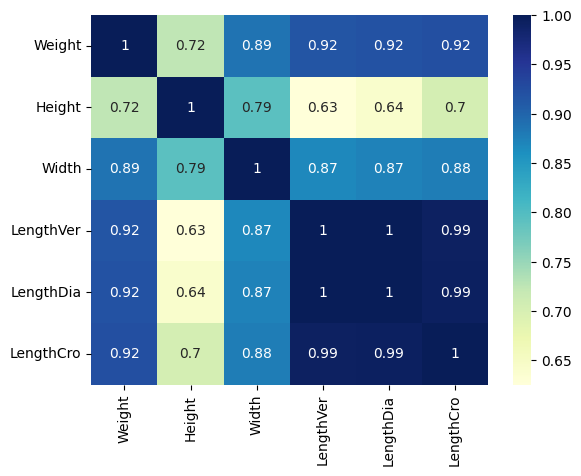

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');
#rubah menjadi heatmap

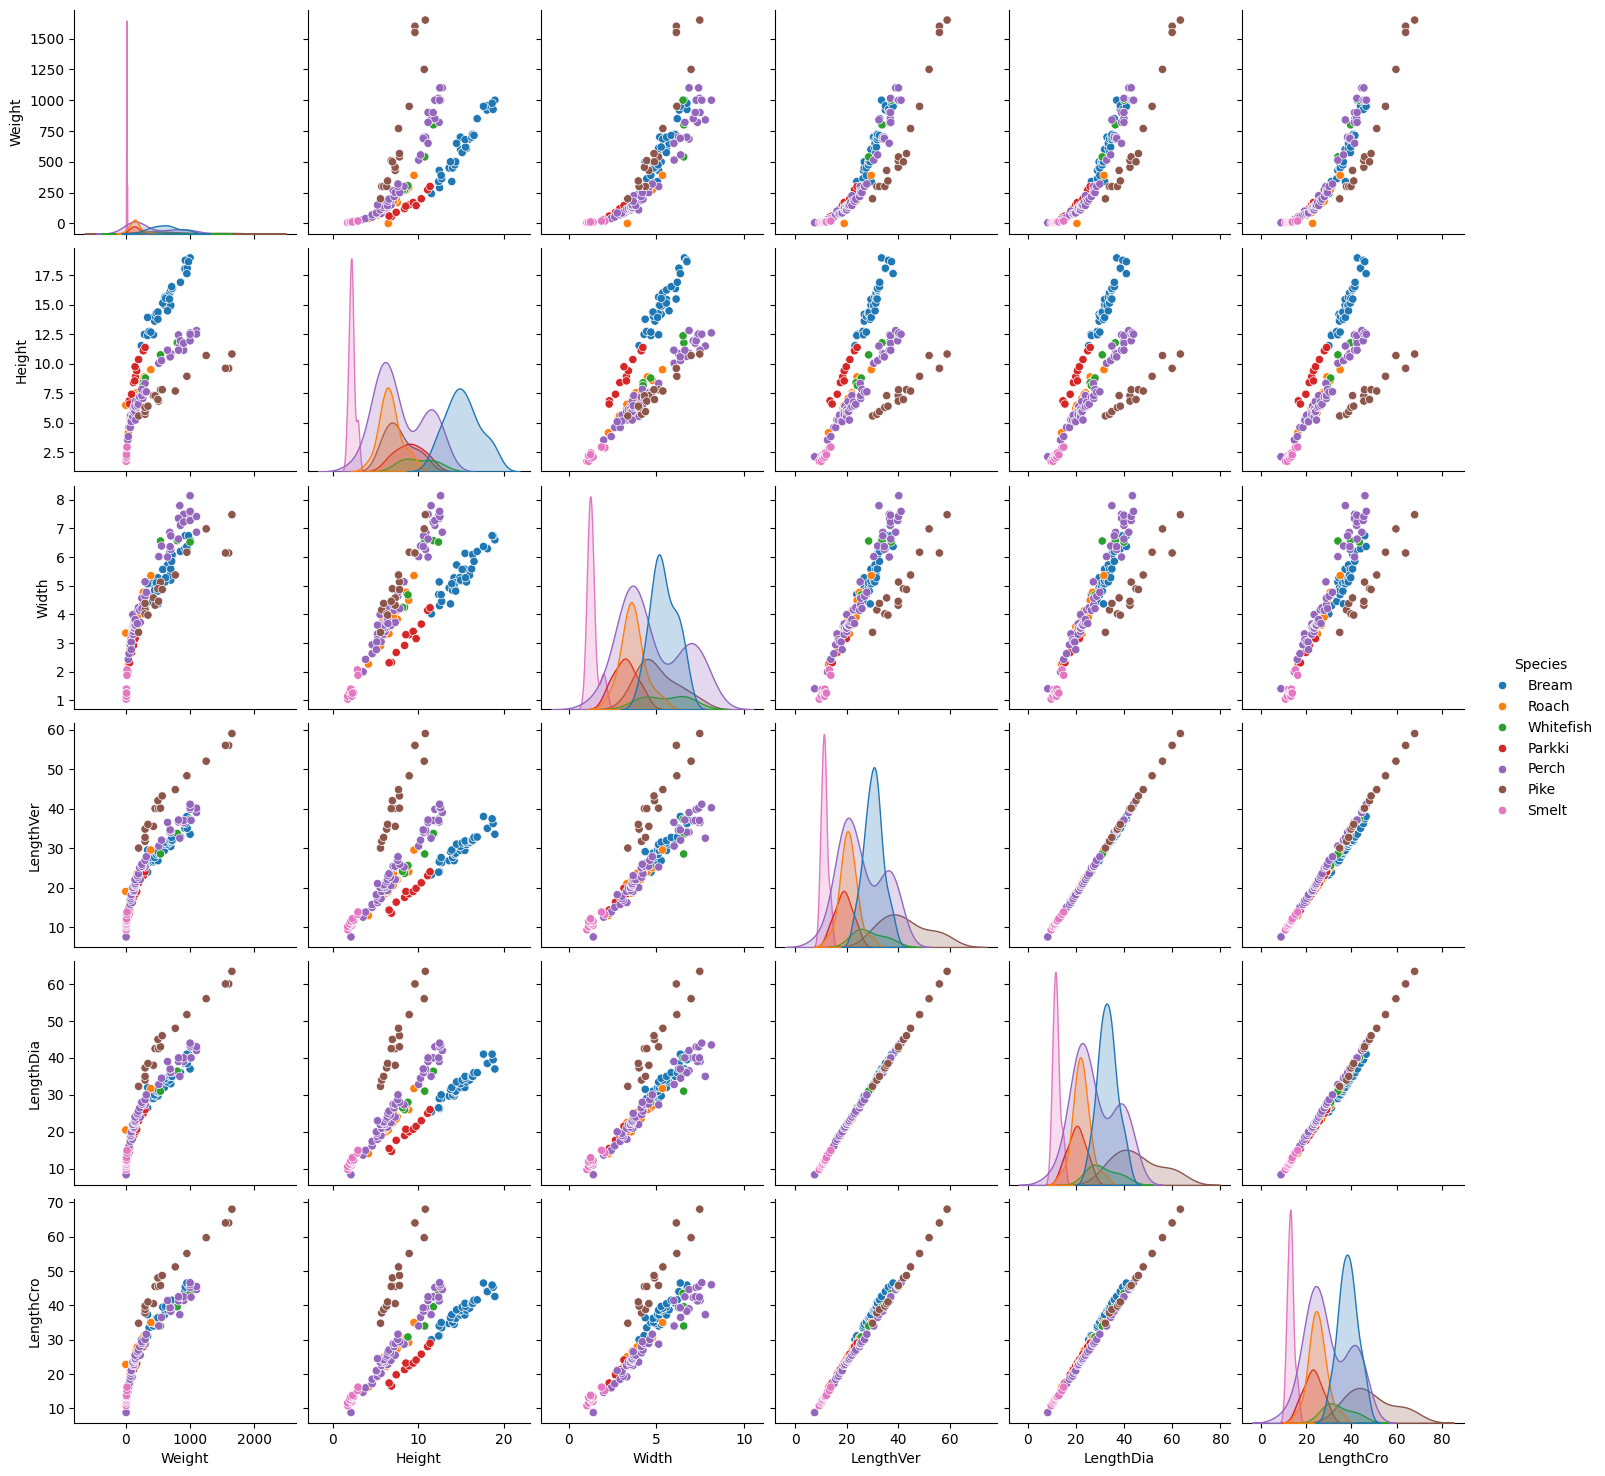

In [11]:
g = sns.pairplot(df, kind='scatter', hue='Species');
#perubahan bentuk grafik

In [12]:
df.describe().T
#statistik dataset

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142
LengthVer,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
LengthDia,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
LengthCro,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000


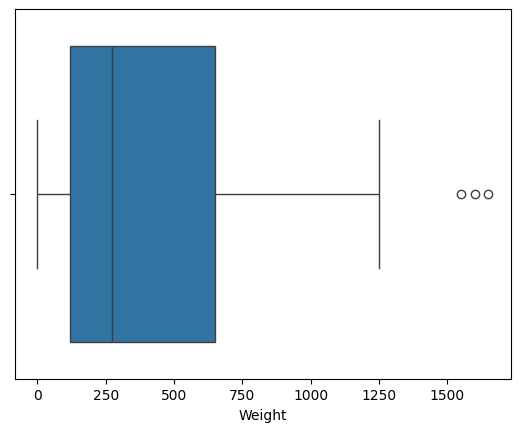

In [13]:
sns.boxplot(x=df['Weight']);
#boxplot yang menunjukkan distribusi data dari kolom 'Weight'

In [14]:
dfw = df['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)
#mengidentifikasi potensi outlier pada kolom 'Weight' dari DataFrame

In [15]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers
#outlier

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

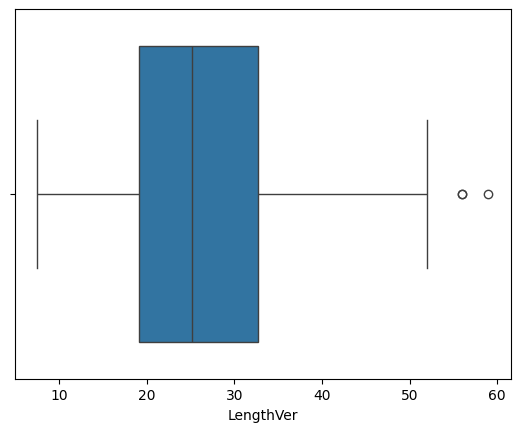

In [16]:
sns.boxplot(x=df['LengthVer']);
#boxplot yang menunjukkan distribusi data dari kolom 'LengthVer'

In [17]:
dflv = df['LengthVer']
dflv_Q1 = dflv.quantile(0.25)
dflv_Q3 = dflv.quantile(0.75)
dflv_IQR = dflv_Q3 - dflv_Q1
dflv_lowerend = dflv_Q1 - (1.5 * dflv_IQR)
dflv_upperend = dflv_Q3 + (1.5 * dflv_IQR)

dflv_outliers = dflv[(dflv < dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers
#mengidentifikasi potensi outlier pada kolom 'LegnthVer' dari DataFrame

142    56.0
143    56.0
144    59.0
Name: LengthVer, dtype: float64

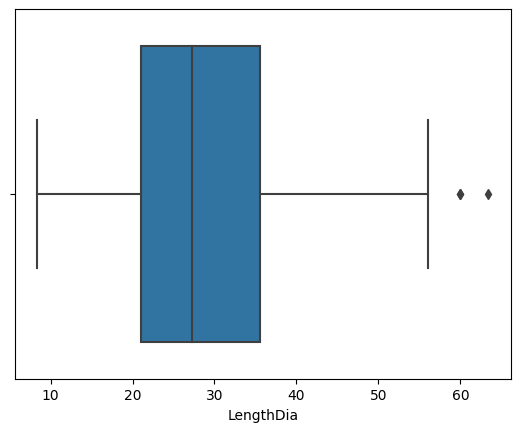

In [61]:
sns.boxplot(x=df['LengthDia']);

In [18]:
dfdia = df['LengthDia']
dfdia_Q1 = dfdia.quantile(0.25)
dfdia_Q3 = dfdia.quantile(0.75)
dfdia_IQR = dfdia_Q3 - dfdia_Q1
dfdia_lowerend = dfdia_Q1 - (1.5 * dfdia_IQR)
dfdia_upperend = dfdia_Q3 + (1.5 * dfdia_IQR)

dfdia_outliers = dfdia[(dfdia < dfdia_lowerend) | (dfdia > dfdia_upperend)]
dfdia_outliers

142    60.0
143    60.0
144    63.4
Name: LengthDia, dtype: float64

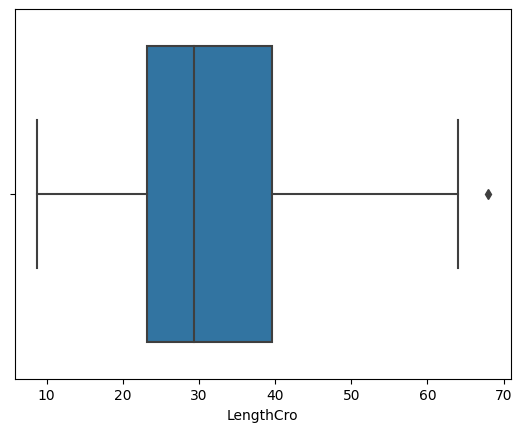

In [63]:
sns.boxplot(x=df['LengthCro']);

In [19]:
dfcro = df['LengthCro']
dfcro_Q1 = dfcro.quantile(0.25)
dfcro_Q3 = dfcro.quantile(0.75)
dfcro_IQR = dfcro_Q3 - dfcro_Q1
dfcro_lowerend = dfcro_Q1 - (1.5 * dfcro_IQR)
dfcro_upperend = dfcro_Q3 + (1.5 * dfcro_IQR)

dfcro_outliers = dfcro[(dfcro < dfcro_lowerend) | (dfcro > dfcro_upperend)]
dfcro_outliers

144    68.0
Name: LengthCro, dtype: float64

In [20]:
df[142:145]
#data outlier

,Species,Weight,Height,Width,LengthVer,LengthDia,LengthCro
142,Pike,1600.0,9.600,6.144,56.0,60.0,64.0
143,Pike,1550.0,9.600,6.144,56.0,60.0,64.0
144,Pike,1650.0,10.812,7.480,59.0,63.4,68.0


In [21]:
df1 = df.drop([142,143,144])
df1.describe().T
#hapus data outlier dan analisis ulang dikarenakan data membuat data lain null

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142
LengthVer,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
LengthDia,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
LengthCro,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700


In [22]:
# Dependant (Target) Variable:
y = df1['Weight']
# Independant Variables:
X = df1.iloc[:,2:7]
#memisahkan variabel

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#membagi dataset

In [41]:
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


In [25]:
reg = LinearRegression()
reg.fit(X_train,y_train)
#train mode'

LinearRegression()

In [26]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)
#parameter model

Model intercept:  -441.0088725388182
Model coefficients:  [ 33.07275974  60.72005923  89.93843031 -32.68619524 -37.53063323]


In [27]:
print(f'y = {reg.intercept_:.2f} + {reg.coef_[0]:.2f}*X1 + {reg.coef_[1]:.2f}*X2 + {reg.coef_[2]:.2f}*X3 + {reg.coef_[3]:.2f}*X4 + {reg.coef_[4]:.2f}*X5')


y = -441.01 + 33.07*X1 + 60.72*X2 + 89.94*X3 + -32.69*X4 + -37.53*X5


In [28]:
y_head = reg.predict(X_train)


In [29]:
r2_score(y_train, y_head)

0.9116039087262157

In [30]:
y_pred = reg.predict(X_test)
#Menggunakan Trained Model dan Test Dataset untuk Memperkirakan Bobot:

In [31]:
print(r2_score(y_test, y_pred))
#Menganalisis Keberhasilan Trained Model dari Test Dataset dan Prediksi:

0.8671964388742468


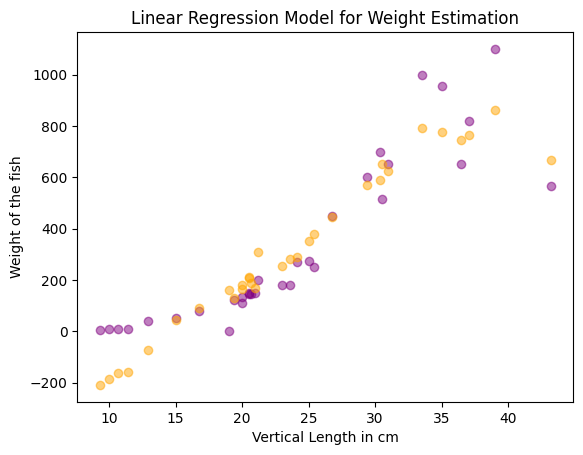

In [32]:
plt.scatter(X_test['LengthVer'], y_test, color='purple', alpha=0.5)
plt.scatter(X_test['LengthVer'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');
#Visualisasi prediksi dengan LenghtVer

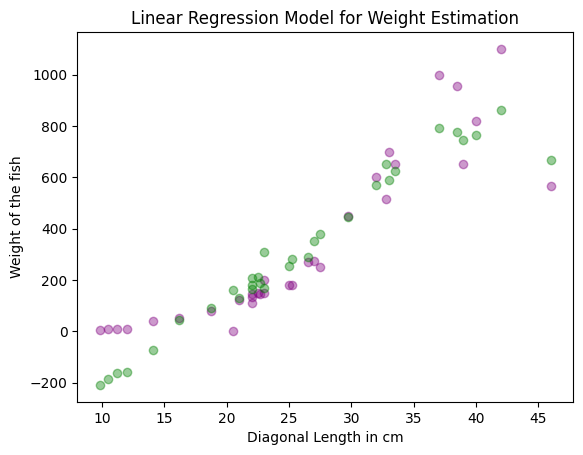

In [206]:
plt.scatter(X_test['LengthDia'], y_test, color='purple', alpha=0.4)
plt.scatter(X_test['LengthDia'], y_pred, color='green', alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

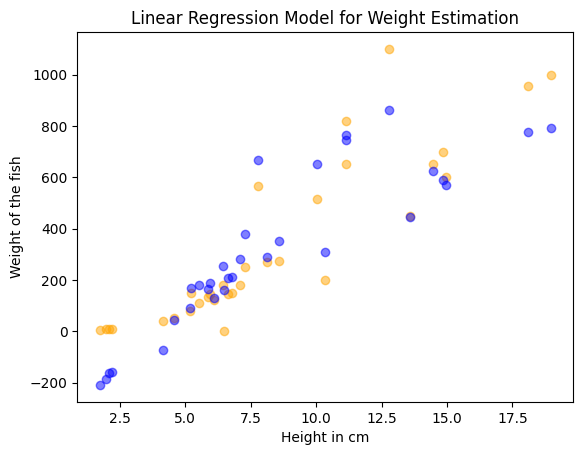

In [207]:
plt.scatter(X_test['Height'], y_test, color='orange', alpha=0.5)
plt.scatter(X_test['Height'], y_pred, color='blue', alpha=0.5)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

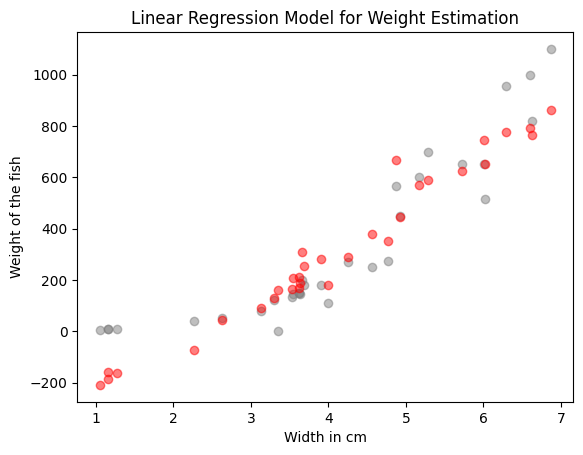

In [208]:
plt.scatter(X_test['Width'], y_test, color='gray', alpha=0.5)
plt.scatter(X_test['Width'], y_pred, color='red', alpha=0.5)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

In [33]:
y_pred1 = pd.DataFrame(y_pred, columns=['Estimasi Berat'])
y_pred1.head()
#estimasi berat

,Estimasi Berat
0,746.034615
1,44.698577
2,282.287266
3,777.208209
4,-74.802289


In [34]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,Weight
0,650.0
1,51.5
2,180.0
3,955.0
4,40.0


In [35]:
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew
#perbandingan data estimasi berat ikan menggunakan regresi linear

,Weight,Estimasi Berat
0,650.0,746.034615
1,51.5,44.698577
2,180.0,282.287266
3,955.0,777.208209
4,40.0,-74.802289
5,0.0,159.717948
6,600.0,569.637735
7,514.0,651.097615
8,272.0,349.707917
9,9.8,-163.684074


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model menggunakan data pelatihan
model.fit(X_train, y_train)

# Simpan model ke dalam file menggunakan pickle
with open('modelok.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
